# Best Cuisines

Notebook for the [IBM's Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science?) final project.

**By [Guillermo Barreiro](https://github.com/gbarreiro)**

In this project, we'll explore some of the world most popular cities, in order to find which are the **top cuisines on each city** and which are the **most popular cuisines around the world**. 

The cities to be analyzed are *New York, Tokyo, Hong Kong, Sydney, Barcelona, Paris, Moscow, Buenos Aires and Mexico DF*.

### 1. Setup

Import the needed libraries, setup the Foursquare API credentials, and define the cities to be explored and the types of cuisines.

In [49]:
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(['seaborn'])

In [2]:
# Foursquare API credentials and endpoint
CLIENT_ID = '5JXQFKUSHUJTB23CXAEGRPSS0WN1U3LVAHQTPKCAOBFVROP5'
CLIENT_SECRET = 'KBNU1HVJ22GBB3JBWQ2WKAQTJ42OMQZDDZDFPRF2VQ3EHGQP'
VERSION = '20200616'
URL = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, 5000)

In [1]:
# List of cities to be explored
cities = ["New York, USA", "Tokyo, Japan", "Hong Kong" , "Sydney, Australia", "Barcelona, Spain", "Paris, France", "Moscow, Russia", "Buenos Aires, Argentina", "Mexico DF"]

# List of international cuisines (extracted from https://developer.foursquare.com/docs/build-with-foursquare/categories/)
cuisines = {
    'Afghan': '503288ae91d4c4b30a586d67', 
    'African': '4bf58dd8d48988d1c8941735', 
    'American': '4bf58dd8d48988d14e941735', 
    'Burmese': '56aa371be4b08b9a8d573568', 
    'Cambodian': '52e81612bcbc57f1066b7a03', 
    'Chinese': '4bf58dd8d48988d145941735', 
    'Filipino': '4eb1bd1c3b7b55596b4a748f', 
    'Himalayan': '52e81612bcbc57f1066b79fb', 
    'Indonesian': '4deefc054765f83613cdba6f', 
    'Japanese': '4bf58dd8d48988d111941735', 
    'Korean': '4bf58dd8d48988d113941735', 
    'Malay': '4bf58dd8d48988d156941735', 
    'Mongolian': '4eb1d5724b900d56c88a45fe', 
    'Thai': '4bf58dd8d48988d149941735', 
    'Tibetan': '52af39fb3cf9994f4e043be9', 
    'Vietnamese': '4bf58dd8d48988d14a941735', 
    'Australian': '4bf58dd8d48988d169941735', 
    'Austrian': '52e81612bcbc57f1066b7a01', 
    'Bangladeshi': '5e179ee74ae8e90006e9a746', 
    'Belgian': '52e81612bcbc57f1066b7a02', 
    'Caribbean': '4bf58dd8d48988d144941735', 
    'Caucasian': '5293a7d53cf9994f4e043a45', 
    'Czech': '52f2ae52bcbc57f1066b8b81', 
    'Dutch': '5744ccdfe4b0c0459246b4d0', 
    'Belarusian': '52e928d0bcbc57f1066b7e97', 
    'Bosnian': '58daa1558bbb0b01f18ec1ee', 
    'Bulgarian': '56aa371be4b08b9a8d5734f3', 
    'Romanian': '52960bac3cf9994f4e043ac4', 
    'Tatar': '52e928d0bcbc57f1066b7e98', 
    'English': '52e81612bcbc57f1066b7a05', 
    'French': '4bf58dd8d48988d10c941735', 
    'German': '4bf58dd8d48988d10d941735', 
    'Greek': '4bf58dd8d48988d10e941735', 
    'Hawaiian': '52e81612bcbc57f1066b79fe', 
    'Hungarian': '52e81612bcbc57f1066b79fa', 
    'Indian': '4bf58dd8d48988d10f941735', 
    'Italian': '4bf58dd8d48988d110941735', 
    'Salvadoran': '5745c7ac498e5d0483112fdb', 
    'Argentinian': '4bf58dd8d48988d107941735', 
    'Brazilian': '4bf58dd8d48988d16b941735', 
    'Colombian': '58daa1558bbb0b01f18ec1f4', 
    'Peruvian': '4eb1bfa43b7b52c0e1adc2e8', 
    'Venezuelan': '56aa371be4b08b9a8d573558', 
    'Moroccan': '4bf58dd8d48988d1c3941735', 
    'Mexican': '4bf58dd8d48988d1c1941735', 
    'Egyptian': '5bae9231bedf3950379f89e1', 
    'Iraqi': '5bae9231bedf3950379f89e7', 
    'Israeli': '56aa371be4b08b9a8d573529', 
    'Kurdish': '5744ccdfe4b0c0459246b4ca', 
    'Lebanese': '58daa1558bbb0b01f18ec1cd', 
    'Persian': '52e81612bcbc57f1066b79f7', 
    'Syrian': '5bae9231bedf3950379f89da', 
    'Yemeni': '5bae9231bedf3950379f89ea', 
    'Pakistani': '52e81612bcbc57f1066b79f8', 
    'Polish': '52e81612bcbc57f1066b7a04', 
    'Portuguese': '4def73e84765ae376e57713a', 
    'Russian': '5293a7563cf9994f4e043a44', 
    'Scandinavian': '4bf58dd8d48988d1c6941735', 
    'Scottish': '5744ccdde4b0c0459246b4a3', 
    'Slovak': '56aa371be4b08b9a8d57355a', 
    'Spanish': '4bf58dd8d48988d150941735', 
    'Sri Lankan': '5413605de4b0ae91d18581a9', 
    'Swiss': '4bf58dd8d48988d158941735', 
    'Turkish': '4f04af1f2fb6e1c99f3db0bb', 
    'Ukranian': '52e928d0bcbc57f1066b7e96'
}

# Local cuisine on each city
city_local_cuisines = {
    "New York, USA": "American",
    "Tokyo, Japan": "Japanese",
    "Hong Kong": "Chinese",
    "Sydney, Australia": "Australian",
    "Barcelona, Spain": "Spanish",
    "Paris, France": "French",
    "Moscow, Russia": "Russian",
    "Buenos Aires, Argentina": "Argentinian",
    "Mexico DF": "Mexican"
}

### 2. Get restaurants from Foursquare 

Get the restaurants of each cuisine on each city from Foursquare API, and store it as a Pandas DataFrame.

In [4]:
restaurants = pd.DataFrame(columns=['City', 'Cuisine', 'Number of restaurants'])
for city in cities:
    print(city)
    for cuisine_name, category_id in cuisines.items():
        # For each city, retrieve the top restaurants from Foursquare for each cuisine...
        query = requests.get("{url}&near={city}&categoryId={category_id}".format(url=URL, city=city, category_id=category_id))
        if query.status_code == 200:
            number = query.json()
            restaurants = restaurants.append({
                'City': city,
                'Cuisine': cuisine_name,
                'Number of restaurants': number
            }, ignore_index=True)
        
restaurants

New York, USA
Tokyo, Japan
Hong Kong
Sydney, Australia
Barcelona, Spain
Paris, France
Moscow, Russia
Buenos Aires, Argentina
Mexico DF


,City,Cuisine,Number of restaurants
0,"New York, USA",Afghan,8
1,"New York, USA",African,75
2,"New York, USA",American,386
3,"New York, USA",Burmese,9
4,"New York, USA",Cambodian,9
...,...,...,...
572,Mexico DF,Spanish,154
573,Mexico DF,Sri Lankan,4
574,Mexico DF,Swiss,10
575,Mexico DF,Turkish,5


### 3. Transform the data

Transform the data to a matrix where for each city, the percentage of restaurants for each cuisine is shown. Look how the data is normalized, so the DataFrame contains percentages instead the number of restaurants on each city.

In [6]:
# One-hot encoding
restaurants_onehot = pd.get_dummies(restaurants['Cuisine'], prefix="", prefix_sep="")
restaurants_onehot = restaurants_onehot.multiply(restaurants['Number of restaurants'], axis=0)
restaurants_onehot = pd.concat([restaurants['City'], restaurants_onehot], axis=1)

# Group by city
cuisines_city = restaurants_onehot.groupby('City').sum().reset_index()
cuisines_city = cuisines_city.set_index(keys='City')

# Normalize the numbers
cuisines_city_normalized = cuisines_city.div(cuisines_city.sum(axis=1), axis=0)
cuisines_city_normalized = 100*cuisines_city_normalized

# Show the final DataFrame
cuisines_city_normalized

,Afghan,African,American,Argentinian,Australian,Austrian,Bangladeshi,Belarusian,Belgian,Bosnian,...,Swiss,Syrian,Tatar,Thai,Tibetan,Turkish,Ukranian,Venezuelan,Vietnamese,Yemeni
City,,,,,,,,,,,,,,,,,,,,,
"Barcelona, Spain",0.271444,0.705755,5.483170,4.125950,0.542888,0.108578,0.000000,0.000000,0.814332,0.000000,...,0.380022,0.271444,0.00000,1.248643,0.108578,1.845820,0.054289,0.760043,1.031488,0.000000
"Buenos Aires, Argentina",0.751174,0.469484,8.169014,21.690141,0.563380,0.187793,0.000000,0.000000,0.751174,0.000000,...,0.281690,0.000000,0.00000,0.751174,0.093897,0.657277,0.000000,0.751174,0.657277,0.000000
Hong Kong,0.239808,0.299760,0.000000,0.239808,1.618705,0.000000,0.000000,0.000000,0.779376,0.000000,...,0.299760,0.059952,0.00000,13.189448,0.299760,1.258993,0.000000,0.000000,8.573141,0.000000
Mexico DF,0.977199,0.279200,10.981852,6.561191,0.232666,0.791066,0.000000,0.000000,0.325733,0.046533,...,0.465333,0.000000,0.00000,1.489065,0.418799,0.232666,0.139600,0.511866,0.465333,0.000000
"Moscow, Russia",0.326797,0.272331,7.135076,0.217865,0.217865,0.000000,0.000000,0.217865,1.470588,0.000000,...,0.326797,0.000000,0.43573,2.069717,0.000000,3.267974,2.287582,0.000000,6.644880,0.000000
"New York, USA",0.149337,1.400037,7.205525,0.373343,1.194699,0.298675,0.018667,0.000000,1.698712,0.018667,...,1.885384,0.037334,0.00000,5.208139,0.448012,1.717379,0.336009,0.317342,2.949412,0.149337
"Paris, France",0.179533,1.795332,6.247756,0.825853,0.538600,0.035907,0.000000,0.000000,1.436266,0.000000,...,0.251346,0.143627,0.00000,8.150808,0.251346,1.974865,0.071813,0.107720,5.350090,0.035907
"Sydney, Australia",0.645161,0.430108,1.849462,0.172043,8.258065,0.172043,0.172043,0.000000,0.602151,0.043011,...,0.258065,0.086022,0.00000,0.000000,0.043011,2.623656,0.000000,0.000000,7.526882,0.043011
"Tokyo, Japan",0.391543,0.443748,7.517619,0.156617,1.070217,0.130514,0.104411,0.026103,0.939702,0.000000,...,0.261028,0.000000,0.00000,7.204385,0.104411,1.853302,0.104411,0.000000,3.706604,0.000000


### 4. Data insights

Now that the data is ready, we'll plot some graphs to get to know:
- The top 10 cuisines for each city
- The top cities for each cuisine
- Popularity of local cuisine on each city
- Most popular cuisines in the world

#### Top 10 cuisines for each city
For each city, we'll plot a bar graph with the 10 most popular cuisines, sorted by the percentage of restaurants on this city. The local cuisine for each city will be ploted in red.

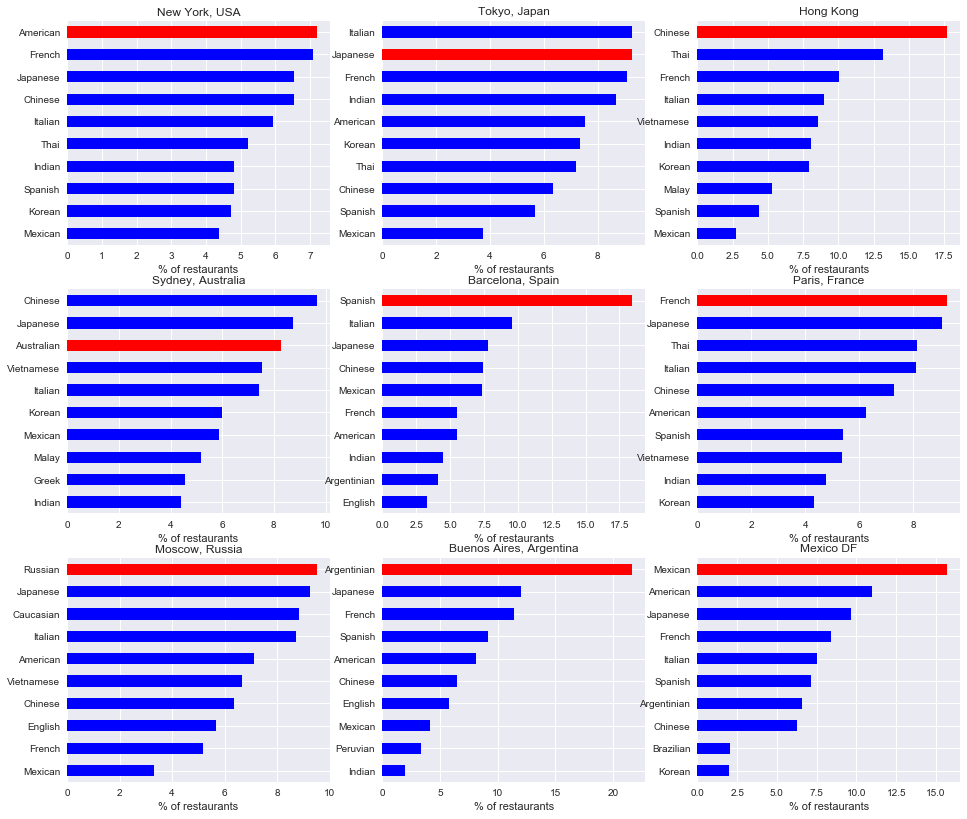

In [51]:
fig = plt.figure()
for index, city in enumerate(cities):
    # For each city, get the top 10 cuisines and plot them in a horizontal bar graph
    ax = fig.add_subplot(3, 3, index+1)

    # Get the top 10 cuisines for the city
    cuisines = cuisines_city_normalized.loc[city]
    cuisines = cuisines.sort_values(ascending=False).head(10).sort_values(ascending=True)
    
    # Plot in red the bar with the local cuisine, plot in blue the rest
    local_cuisine = city_local_cuisines[city]
    color = ''
    for i in cuisines.keys():
        if i == local_cuisine:
            color = color + 'r'
        else:
            color = color + 'b'
    
    # Plot the top 10 cuisines
    cuisines.plot(kind='barh', ax=ax, figsize=(16, 14), color=list(color))
    ax.set_title(city)
    ax.set_xlabel("% of restaurants")

In some cities we can see how the most popular cuisines are from close countries: for instance, in Mexico DF, American restaurants are quite popular; in Hong Kong, Thai and Vietnamese food seems also to be very popular, or in Sydney, food coming from East Asian countries like China, Japan, Vietnam or Korea is very famous. However, it's not the case of New York, where the difference between the 1st and 10th more popular is less than a 3%, or Barcelona, where after Spanish food and Italian, the following three most popular cuisines are Japanese, Chinese and Mexican, countries which are very far from Western Europe.

#### Top cities for each cuisine

Probably you can find the best *sushi* in Tokyo, or the best *tortilla de patatas* in Barcelona, but when talking about quantity, you might be surprised to know how sometimes the local cuisine is not the most popular in the big cities we're analyzing in this notebook. Here we'll plot a bar graph for each of the local cuisines of the analyzed cities, and for each cuisine, we'll see where we can find more restaurants of that cuisine.

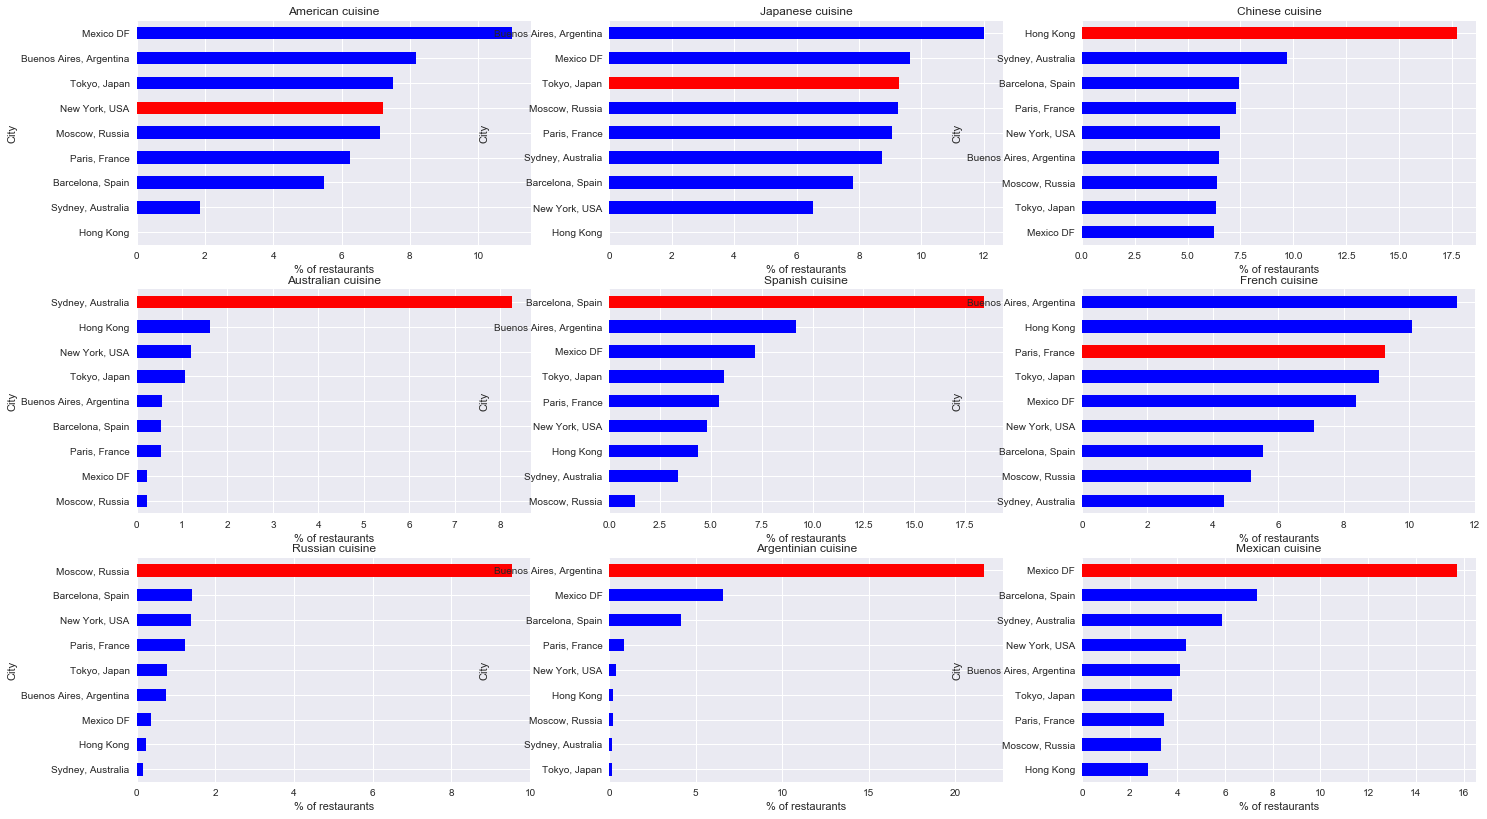

In [52]:
fig = plt.figure()
for index, cuisine in enumerate(city_local_cuisines.values()):
    # For the selected cuisine, plot a bar graph with the cities where there are more restaurants of that cuisine
    ax = fig.add_subplot(3, 3, index+1)
    cuisine_cities = cuisines_city_normalized[cuisine]
    cuisine_cities = cuisine_cities.sort_values(ascending=True).head(9)

    # Plot in red the bar with the city where this cuisine is local, plot in blue the rest
    color = ''
    for i in cuisine_cities.keys():
        if i in city_local_cuisines and city_local_cuisines[i] == cuisine:
            color = color + 'r'
        else:
            color = color + 'b'

    cuisine_cities.plot(kind='barh', ax=ax, figsize=(24, 14), color=list(color))
    plt.title("%s cuisine" %cuisine)
    plt.xlabel("% of restaurants")

It might be obvious that from the analyzed cities, the one with more American food restaurants would be New York, Japanese Tokyo, and so on. However, it's surprising to see how it's not always like this.
- Chinese, Australian, Spanish, Russian, Argentinan and Mexican cuisines are quite more popular in their respective cities than in the rest of the world.
- American, Japanese and French cuisines are more popular in some foreign cities, like Mexico DF or Buenos Aires, rather than in their countries' capital cities.

#### Popularity of local cuisine on each city

As we saw before, in some cities the local cuisine is not the most popular. Here we'll check how popular are the local cuisines on each of the analyzed cities. Again, with a bar graph, we'll see the percentage of local cuisine restaurants for each city.

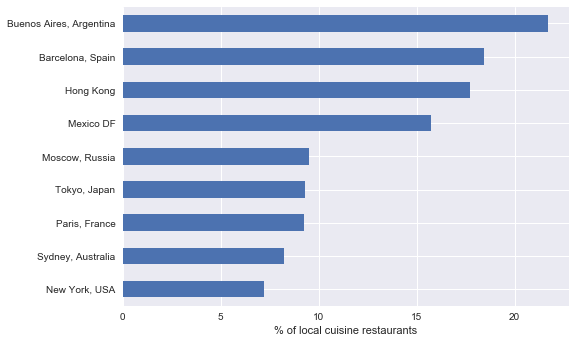

In [50]:
percentages = {}
for city, cuisine in city_local_cuisines.items():
    # For each city, get the percentage of local cuisine restaurants
    percentage = cuisines_city_normalized.at[city, cuisine]
    percentages[city] = percentage

# Plot the data in a bar graph
df_percentages = pd.Series(percentages).sort_values(ascending=True)
df_percentages.plot(kind='barh')
plt.xlabel('% of local cuisine restaurants')
plt.show()

From this plot, it seems obvious that in Barcelona, Buenos Aires, Mexico DF or Hong Kong, the local cuisine is really popular, while in cities like New York or Sydney, there is a wider variety of cuisines.

#### Most popular cuisines around the world

From the data we have, we can extract which are the most popular cuisines around the world. In this final section, we'll plot the average percentage of each cuisine in a bar graph, to check which are the top 10 cuisines around the world (based in the 9 analyzed cities).

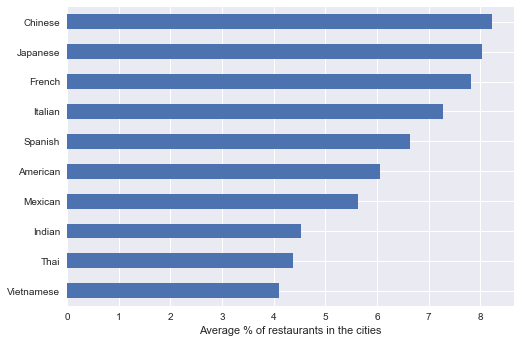

In [58]:
# Calculate the average percentage of restaurants of each cuisine for the 9 analyzed cities
famous_cuisines = cuisines_city_normalized.mean(axis=0)

# Get the top 10 cuisines around the world
famous_cuisines = famous_cuisines.sort_values(ascending=True)
famous_cuisines = famous_cuisines.tail(10)

# Plot the data in a horizontal bar graph
famous_cuisines.plot(kind='barh')
plt.xlabel('Average % of restaurants in the cities')
plt.show()

There is not a big difference between the 1st (Chinese, 8%) and 10th (Vietnamese, 4%) most popular cuisines. From this top 10, Chinese, Japanese, French, Spanish, American and Mexican are the local cuisines of some of the analyzed cities. When we analyzed the most popular cuisines on each city, we could see that for Barcelona (Spain), Hong Kong (China), Paris (France), New York (America) and Mexico DF, the most popular cuisine was the local one, and for Tokyo, the Japanese cuisine was in 2nd place, pretty close to the 1st (Italian). 

Italian cuisine seems to be very popular, but we didn't analyze any Italian city, so we can't tell if it's also so popular inside the country.